# Do the fitting for all the samples based on the fitting of JBNP33L

In [1]:
%run -i utils.py
%run -i startup.py

## Load the data

In [2]:
file_info = pd.read_csv("data_info.csv", index_col=0)
file_info

,iq,sq,fq,gr,fgr0,fgr1,fgr2,csv0,csv1,csv2,...,csv_two_phase,fgr_two_phase,csv_two_phase_sine_wave,fgr_two_phase_sine_wave,csv_one_phase_logsp,fgr_one_phase_logsp,csv_two_phase_logsp,fgr_two_phase_logsp,final_csv,final_fgr
sample,,,,,,,,,,,,,,,,,,,,,
JBNP31,data/JBNP31_20180812-155857_f2d424_0001_qmax22...,data/JBNP31_20180812-155857_f2d424_0001_qmax22...,data/JBNP31_20180812-155857_f2d424_0001_qmax22...,data/JBNP31_20180812-155857_f2d424_0001_qmax22...,res/JBNP31_fix_xyz_0.fgr,res/JBNP31_free_xyz_0.fgr,res/JBNP31_free_xyz_add_delta_0.fgr,res/JBNP31_fix_xyz_0.csv,res/JBNP31_free_xyz_0.csv,res/JBNP31_free_xyz_add_delta_0.csv,...,res/JBNP31_two_phase_0.csv,res/JBNP31_two_phase_0.fgr,NaN,NaN,res/JBNP31_one_phase_logsp_0.csv,res/JBNP31_one_phase_logsp_0.fgr,NaN,NaN,res/JBNP31_two_phase_0.csv,res/JBNP31_two_phase_0.fgr
JBNP32L,data/JBNP32L_20180812-161119_2a1898_0001_qmax2...,data/JBNP32L_20180812-161119_2a1898_0001_qmax2...,data/JBNP32L_20180812-161119_2a1898_0001_qmax2...,data/JBNP32L_20180812-161119_2a1898_0001_qmax2...,res/JBNP32L_fix_xyz_0.fgr,res/JBNP32L_free_xyz_2.fgr,res/JBNP32L_free_xyz_add_delta_1.fgr,res/JBNP32L_fix_xyz_0.csv,res/JBNP32L_free_xyz_2.csv,res/JBNP32L_free_xyz_add_delta_1.csv,...,NaN,NaN,res/JBNP32L_two_phase_sine_wave_0.csv,res/JBNP32L_two_phase_sine_wave_0.fgr,res/JBNP32L_one_phase_logsp_0.csv,res/JBNP32L_one_phase_logsp_0.fgr,res/JBNP32L_two_phase_logsp_0.csv,res/JBNP32L_two_phase_logsp_0.fgr,res/JBNP32L_add_sine_wave_0.csv,res/JBNP32L_add_sine_wave_0.fgr
JBNP32,data/JBNP32_20180812-154511_c241b0_0001_qmax22...,data/JBNP32_20180812-154511_c241b0_0001_qmax22...,data/JBNP32_20180812-154511_c241b0_0001_qmax22...,data/JBNP32_20180812-154511_c241b0_0001_qmax22...,res/JBNP32_fix_xyz_0.fgr,res/JBNP32_free_xyz_0.fgr,res/JBNP32_free_xyz_add_delta_0.fgr,res/JBNP32_fix_xyz_0.csv,res/JBNP32_free_xyz_0.csv,res/JBNP32_free_xyz_add_delta_0.csv,...,res/JBNP32_two_phase_1.csv,res/JBNP32_two_phase_1.fgr,NaN,NaN,res/JBNP32_one_phase_logsp_0.csv,res/JBNP32_one_phase_logsp_0.fgr,NaN,NaN,res/JBNP32_two_phase_1.csv,res/JBNP32_two_phase_1.fgr
JBNP33L,data/JBNP33L_20180812-162201_05b4b9_0001_qmax2...,data/JBNP33L_20180812-162201_05b4b9_0001_qmax2...,data/JBNP33L_20180812-162201_05b4b9_0001_qmax2...,data/JBNP33L_20180812-162201_05b4b9_0001_qmax2...,res/JBNP33L_fix_xyz_0.fgr,res/JBNP33L_free_xyz_0.fgr,res/JBNP33L_free_xyz_add_delta_0.fgr,res/JBNP33L_fix_xyz_0.csv,res/JBNP33L_free_xyz_0.csv,res/JBNP33L_free_xyz_add_delta_0.csv,...,NaN,NaN,res/JBNP33L_two_phase_sine_wave_0.csv,res/JBNP33L_two_phase_sine_wave_0.fgr,res/JBNP33L_one_phase_logsp_1.csv,res/JBNP33L_one_phase_logsp_1.fgr,res/JBNP33L_two_phase_logsp_0.csv,res/JBNP33L_two_phase_logsp_0.fgr,res/JBNP33L_two_phase_sine_wave_0.csv,res/JBNP33L_two_phase_sine_wave_0.fgr
JBNP33,data/JBNP33_20180812-153159_3bdc30_0001_qmax22...,data/JBNP33_20180812-153159_3bdc30_0001_qmax22...,data/JBNP33_20180812-153159_3bdc30_0001_qmax22...,data/JBNP33_20180812-153159_3bdc30_0001_qmax22...,res/JBNP33_fix_xyz_0.fgr,res/JBNP33_free_xyz_0.fgr,res/JBNP33_free_xyz_add_delta_0.fgr,res/JBNP33_fix_xyz_0.csv,res/JBNP33_free_xyz_0.csv,res/JBNP33_free_xyz_add_delta_0.csv,...,res/JBNP33_two_phase_0.csv,res/JBNP33_two_phase_0.fgr,NaN,NaN,res/JBNP33_one_phase_logsp_0.csv,res/JBNP33_one_phase_logsp_0.fgr,NaN,NaN,res/JBNP33_two_phase_0.csv,res/JBNP33_two_phase_0.fgr


In [3]:
data_set = [load_data(f, {"qdamp":0.0313, "qbroad": 0.0131}) for f in file_info["gr"]]

In [4]:
results = [pd.read_csv(f, index_col=0) for f in file_info["final_csv"]]

In [5]:
# suggested fitting order
B_order = [["A_scale", "B_scale"], ["B_psize", "B_psig"], ["B_lat"], ["B_adp", "B_delta2"], ["B_xyz"]]
A_order = [["B_scale"], ["A_scale", "A_psize"], ["A_lat"], ["A_adp", "A_delta2"], ["A_xyz"]]
L_order = [["A_scale", "B_scale", "amplitube"], "phi", "sigma" , "wavelength"]

## Fit JBNP32

In [6]:
model = create_model_no_ligand()
model.set_profile(data_set[2])

In [11]:
model.load("cache/JBNP32.res")
model.set_xrange(xmin=1.6, xmax=50., xstep=0.1)
model.set_order("B_psize")
model.optimize()

Start fit with all parameters fixed.
Round 1 / 1: Free B_psize ...
`gtol` termination condition is satisfied.
Function evaluations 2, initial cost 2.0433e-01, final cost 2.0433e-01, first-order optimality 1.28e-06.


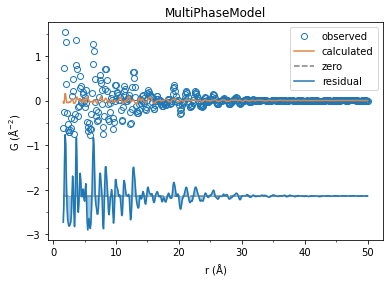

In [10]:
model.plot()

In [23]:
model.update_result()
model.save("cache/JBNP32.res")

## Fit JBNP32L

In [43]:
model = create_model_with_ligand()
model.set_profile(data_set[1])

In [85]:
model.load("cache/JBNP32.res")
model.set_xrange(xmin=1.6, xmax=50., xstep=0.01)
model.set_order("all")
model.optimize()

Start fit with all parameters fixed.
Free all ...
`ftol` termination condition is satisfied.
Function evaluations 40, initial cost 3.2966e+01, final cost 9.1772e-01, first-order optimality 2.68e-02.


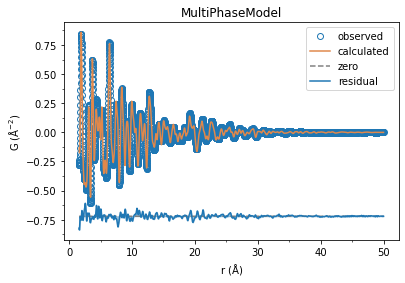

In [90]:
model.plot()

In [91]:
model.save("cache/JBNP32L.res")

## Fit JBNP33

In [116]:
model = create_model_no_ligand()
model.set_profile(data_set[4])

In [119]:
model.load("cache/JBNP33.res")
model.set_xrange(xmin=1.6, xmax=50., xstep=0.01)
model.set_order("all")
model.optimize()

Start fit with all parameters fixed.
Free all ...
`ftol` termination condition is satisfied.
Function evaluations 5, initial cost 2.9142e+00, final cost 2.9037e+00, first-order optimality 2.77e-01.


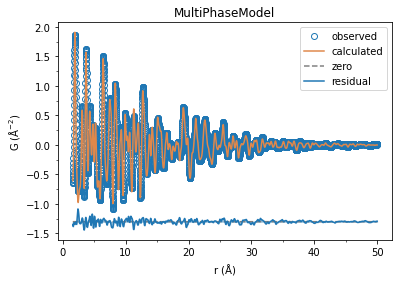

In [120]:
model.plot()

In [121]:
model.update_result()
model.save("cache/JBNP33.res")

## Fit JBNP33L

In [54]:
model = create_model_with_ligand()
model.set_profile(data_set[3])

In [88]:
model.load("cache/JBNP33L.res")
model.set_xrange(xmin=1.6, xmax=50., xstep=0.01)
model.set_order("all")
model.optimize()

Start fit with all parameters fixed.
Free all ...
`xtol` termination condition is satisfied.
Function evaluations 17, initial cost 2.8598e+00, final cost 2.1743e+00, first-order optimality 7.45e+01.


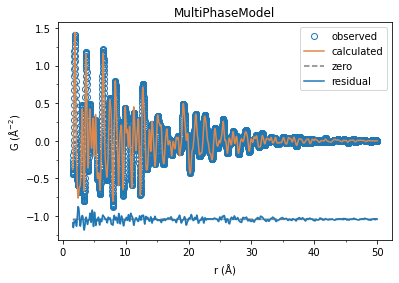

In [90]:
model.plot()

In [92]:
model.update_result()
model.save("cache/JBNP33L.res")

## Fit JBNP31

In [27]:
model = create_model_no_ligand()
model.set_profile(data_set[3])

In [28]:
model.load("cache/JBNP31.res")
model.set_xrange(xmin=1.6, xmax=50., xstep=0.01)
model.set_order("all")
model.optimize()

Start fit with all parameters fixed.
Free all ...
`ftol` termination condition is satisfied.
Function evaluations 2, initial cost 2.6637e+00, final cost 2.6637e+00, first-order optimality 2.58e-01.


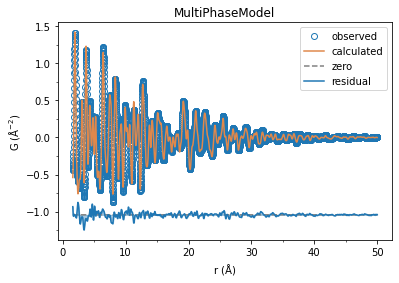

In [29]:
model.plot()

In [30]:
model.update_result()
model.save("cache/JBNP31.res")

## Output the results

In [33]:
def output_results():
    for name, data in zip(file_info.index, data_set):
        model = create_model_with_ligand()
        model.set_profile(data)
        model.set_xrange(xmin=1.6, xmax=50., xstep=0.01)
        model.load("cache/{}.res".format(name))
        model.update_result()
        model.export_in_files("results", name)

## Visualize the results

In [2]:
result = load_and_concat("JBNP3*_result.nc")

In [3]:
# result.to_netcdf("summary/parameters.nc")

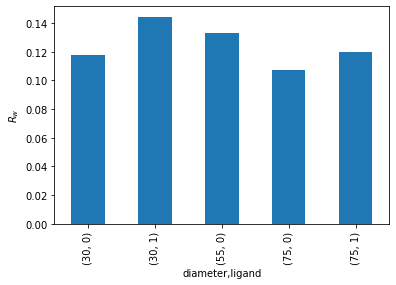

In [12]:
_ = result["rw"].set_index({"dim_0": ["diameter", "ligand"]}).to_series().plot.bar()
_ = plt.ylabel("$R_w$")

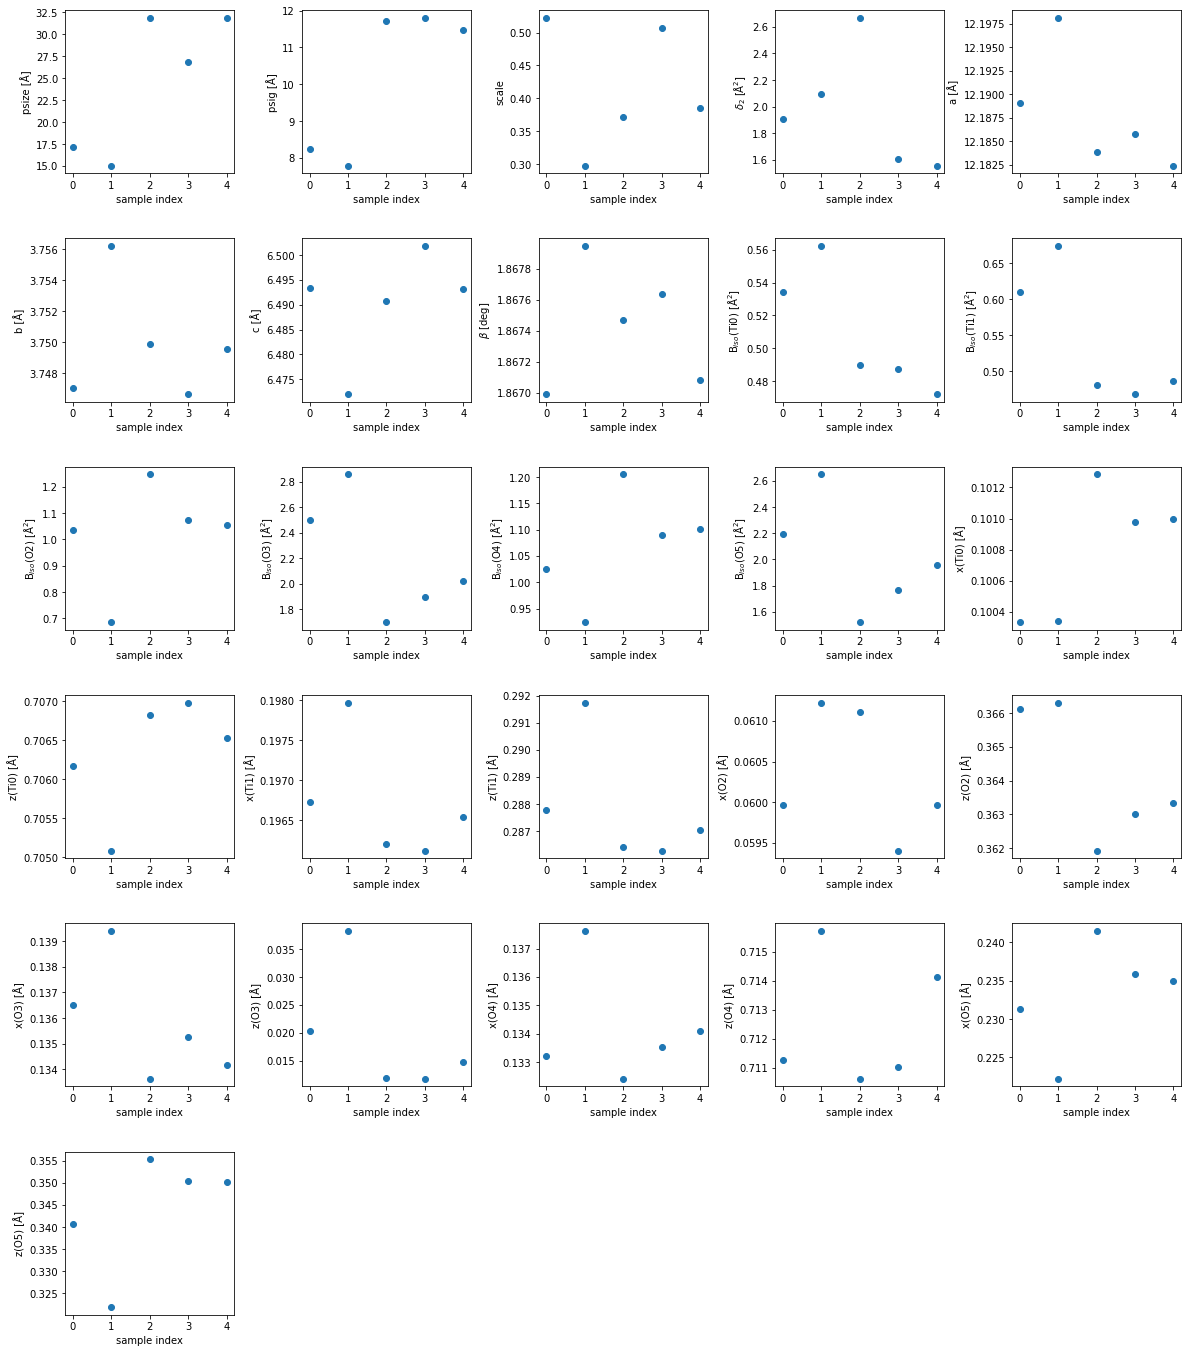

In [13]:
bronze = get_phase(result, "B_")
axes = plot_results(bronze, num_col=5, figure_config={"figsize": (5 * 4, 6 * 4)}, grid_config={"wspace": 0.4, "hspace": 0.4})
for ax in axes:
    ax.set_xlabel("sample index")

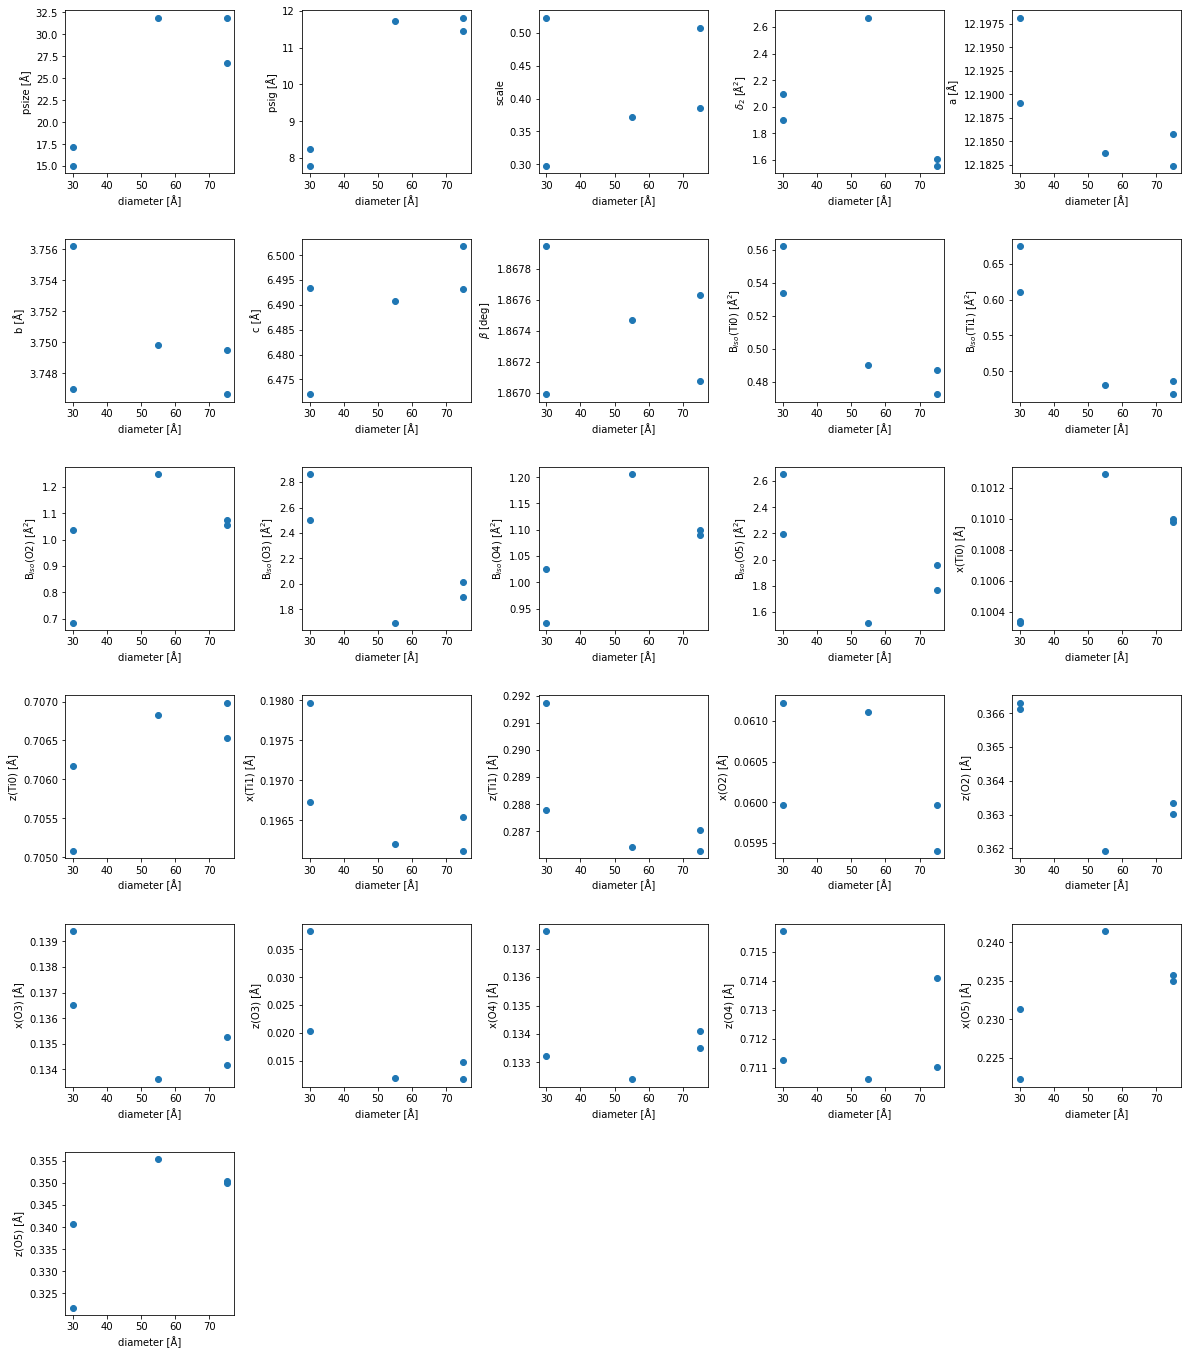

In [14]:
bronze2 = bronze.set_index({"dim_0": ["diameter"]})
bronze2["dim_0"].attrs["standard_name"] = "diameter"
bronze2["dim_0"].attrs["units"] = "Å"
plot_results(bronze2, num_col=5, figure_config={"figsize": (5 * 4, 6 * 4)}, grid_config={"wspace": 0.4, "hspace": 0.4});

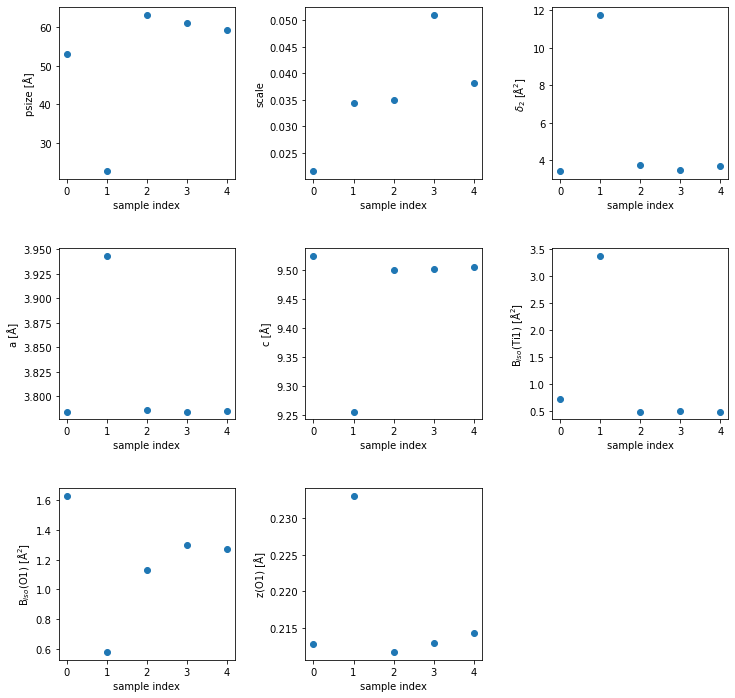

In [15]:
anatase = get_phase(result, "A_")
axes = plot_results(anatase, num_col=3, figure_config={"figsize": (3 * 4, 3 * 4)}, grid_config={"wspace": 0.4, "hspace": 0.4})
for ax in axes:
    ax.set_xlabel("sample index")

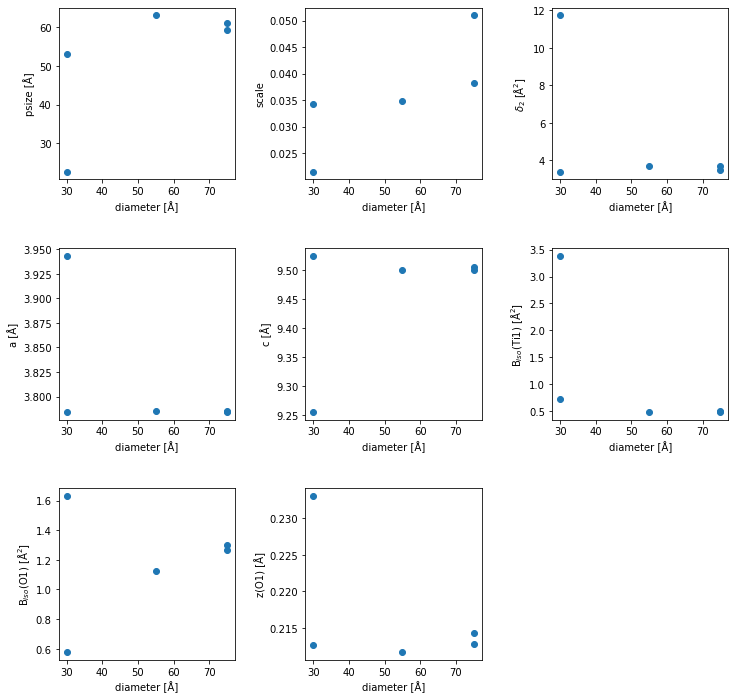

In [16]:
anatase2 = anatase.set_index({"dim_0": "diameter"})
anatase2["dim_0"].attrs["standard_name"] = "diameter"
anatase2["dim_0"].attrs["units"] = "Å"
plot_results(anatase2, num_col=3, figure_config={"figsize": (3 * 4, 3 * 4)}, grid_config={"wspace": 0.4, "hspace": 0.4});

In [4]:
fits = load_and_concat("JBNP3*_fits.nc")

In [5]:
# fits.to_netcdf("summary/fits.nc")

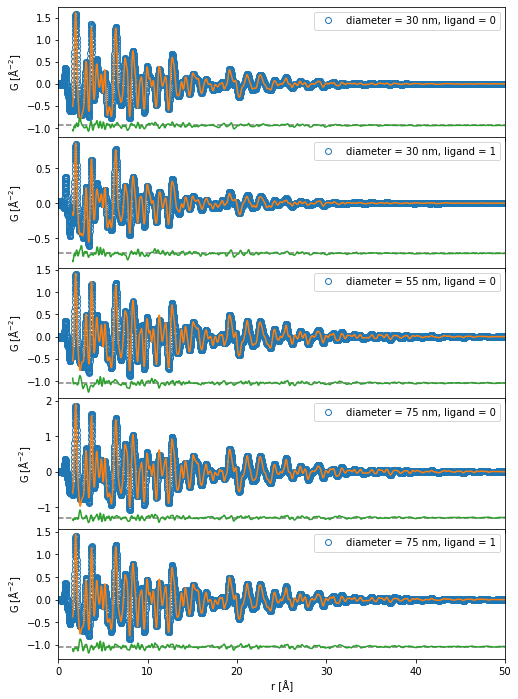

In [11]:
fits = fits.sortby(["diameter", "ligand"])
axes = plot_fits_along_dim(fits, dim="dim_0", num_col=1, figure_config={"figsize": (8, 12)}, grid_config={"hspace": 0}, plot_config={"xlim": (0., 50.)})

def edit_axes():
    n = len(axes)
    for i in range(n - 1):
        ax = axes[i]
        ax.set_xticklabels([])
        ax.set_xlabel("")
    for i in range(n):
        ax = axes[i]
        f = fits.isel(dim_0=i)
        l = "diameter = {} nm, ligand = {}".format(f["diameter"].item(), f["ligand"].item())
        ax.legend([l])
        
edit_axes()